# Data Science Bivariate- Multicolinearity VIF

In [44]:
import pandas as pd
import numpy as np
#read file
from my_class_univariate import myunivariate
dataset=pd.read_csv("PrePlacement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [45]:
#check null values
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [46]:
#split num_cals
cat_cals, num_cals=myunivariate.df_cat_num_split(dataset)
num_cals.remove('sl_no')
num_cals

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

# Covariance

In [47]:
# Check two columns Covariance
dataset[num_cals].cov()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,117.228377,58.853253,42.702550,37.659225,24.535952,9.088585e+05
hsc_p,58.853253,112.063731,33.684453,33.838355,21.517688,7.310079e+05
degree_p,42.702550,33.684453,53.604710,22.078774,17.185200,4.663363e+05
etest_p,37.659225,33.838355,22.078774,176.251018,16.886973,3.727004e+05
mba_p,24.535952,21.517688,17.185200,16.886973,34.028376,1.239934e+05
salary,908858.485818,731007.850848,466336.264888,372700.449468,123993.387361,2.259185e+10


In [ ]:
Assignment
'mba_p' vs 'etest_p' Covariance = 16.886973 different , +ve Covariance
'degree_p' vs 'etest_p' Covariance = 22.078774 different, +ve Covariance

# Correlation

In [48]:
# check two columns Correlation
dataset[num_cals].corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


In [ ]:
Assignment
'mba_p' vs 'salary' Correlation = 0.149163 , low degree of +ve correlation

# Multicolinearity

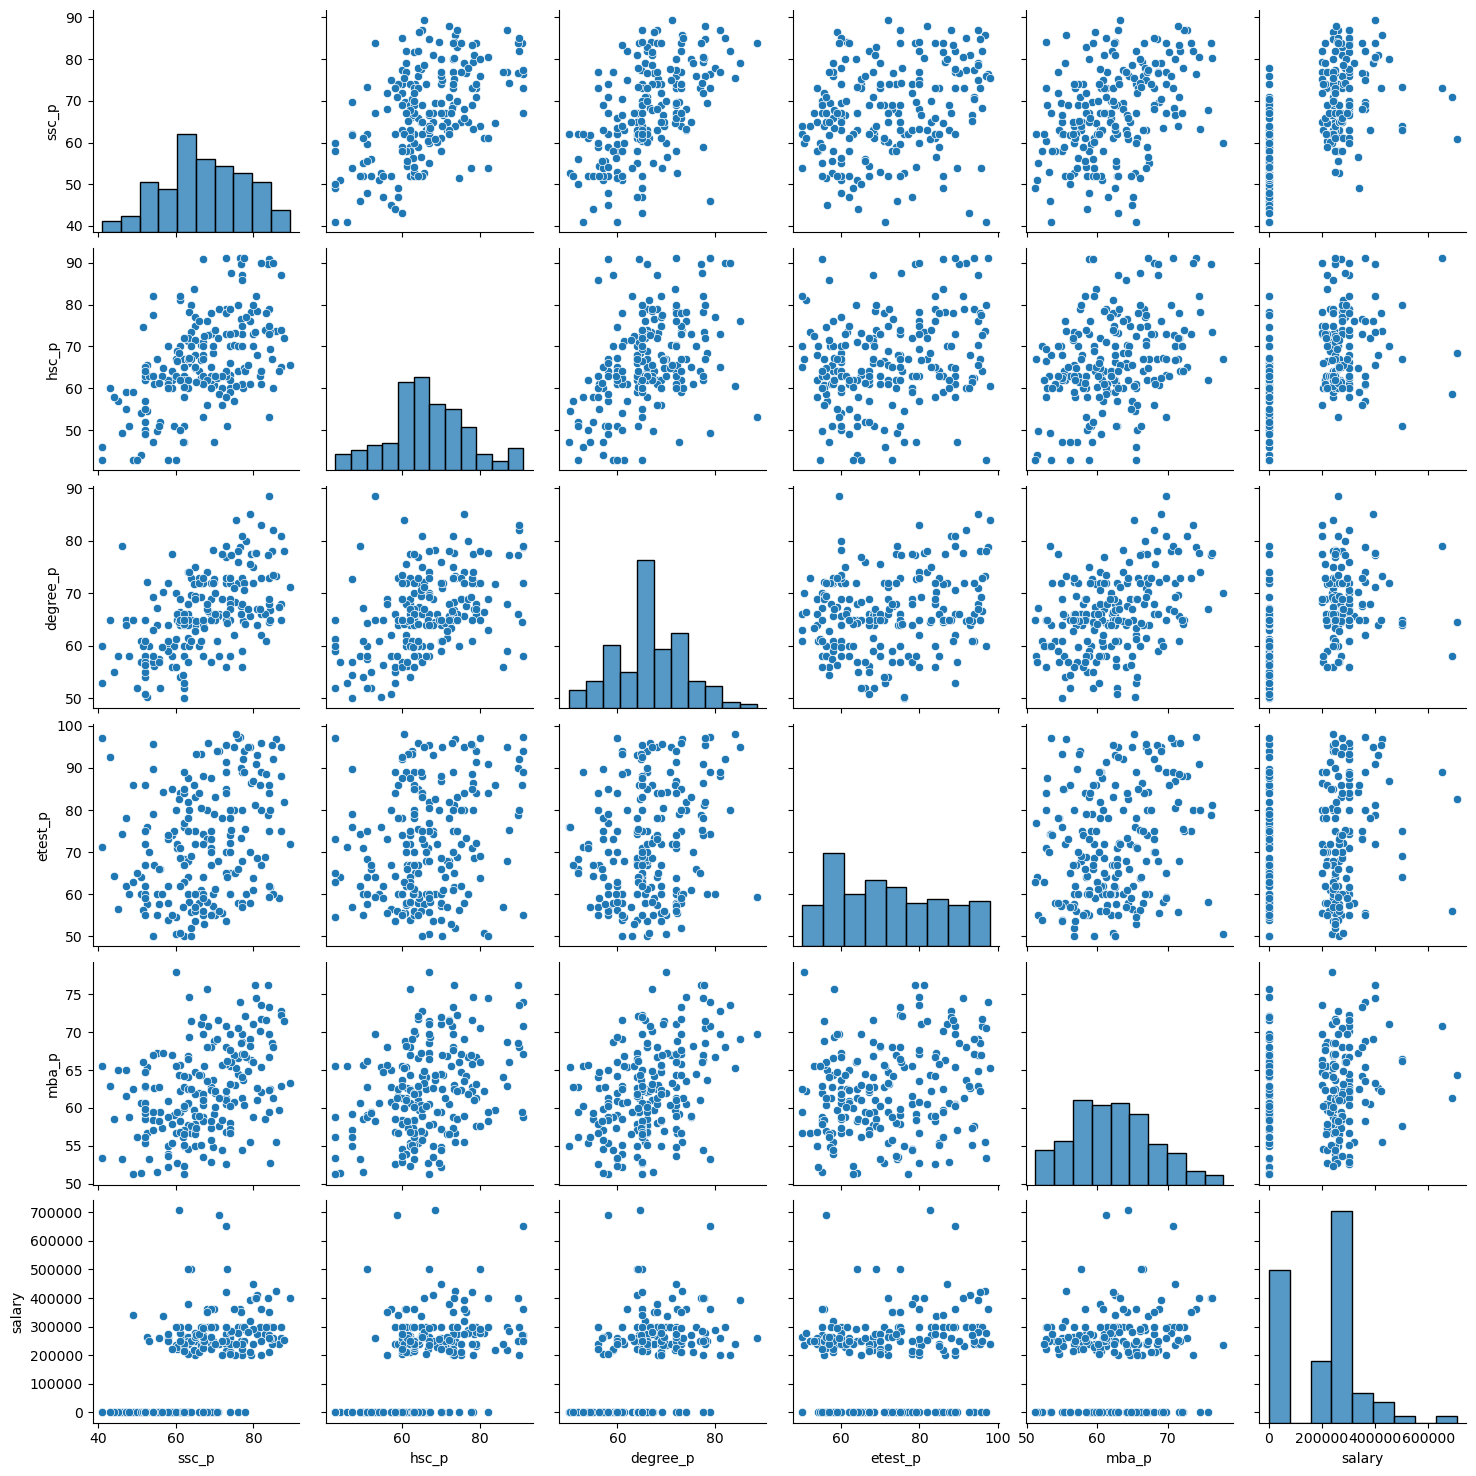

In [49]:
dataset.drop('sl_no', axis=1, inplace=True)

import seaborn as sns
sns.pairplot(dataset)

# Multicolinearity VIF used to remove

In [24]:

#calculating VIF variance_inflation_factor
# 1 = no correlate
# 1-5= morderate correlate
# above 5 high correlate
#calc_vif(dataset[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']])
def calc_vif(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif
    

In [26]:
num_cals

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [29]:
calc_vif(dataset[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']])

,Variable,VIF
0,ssc_p,78.168671
1,hsc_p,61.882196
2,degree_p,114.820554
3,etest_p,32.720365
4,mba_p,116.034378
5,salary,4.171783


In [33]:
calc_vif(dataset[['etest_p', 'salary']])

,Variable,VIF
0,etest_p,2.826904
1,salary,2.826904


# Multicolinearity remove diffrent method

In [50]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def handle_multicollinearity(df, method="corr", threshold=0.9, target=None, n_components=None):
    """
    Handle multicollinearity using different methods.
    
    Parameters:
        df (pd.DataFrame): Feature DataFrame
        method (str): "corr", "vif", "pca", "lasso"
        threshold (float): Threshold for correlation or VIF
        target (pd.Series): Target variable (needed for lasso)
        n_components (int): PCA components (needed for PCA)
        
    Returns:
        pd.DataFrame or np.array: Reduced feature set
    """
    
    if method == "corr":
        # Method 1: Correlation Matrix
        corr_matrix = df.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
        print("Dropping (corr):", to_drop)
        return df.drop(to_drop, axis=1)
    
    elif method == "vif":
        # Method 2: Variance Inflation Factor
        variables = df.columns.tolist()
        dropped = True
        while dropped:
            dropped = False
            X = add_constant(df[variables])
            vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
            max_vif = max(vif[1:])  # skip intercept
            if max_vif > threshold:
                max_var = variables[vif[1:].index(max_vif)]
                print(f"Dropping (VIF) '{max_var}' with VIF={max_vif:.2f}")
                variables.remove(max_var)
                dropped = True
        return df[variables]
    
    elif method == "pca":
        # Method 3: PCA
        if n_components is None:
            n_components = min(df.shape[1], 2)
        pca = PCA(n_components=n_components)
        transformed = pca.fit_transform(df)
        print("Explained Variance Ratio:", pca.explained_variance_ratio_)
        return pd.DataFrame(transformed, columns=[f"PC{i+1}" for i in range(n_components)])
    
    elif method == "lasso":
        # Method 4: Lasso Feature Selection
        if target is None:
            raise ValueError("Target variable required for Lasso.")
        model = LassoCV(cv=5).fit(df, target)
        selected = df.columns[model.coef_ != 0]
        print("Selected (Lasso):", list(selected))
        return df[selected]
    
    else:
        raise ValueError("Invalid method. Choose from 'corr', 'vif', 'pca', 'lasso'.")


In [62]:
# 2️⃣ VIF method
print(handle_multicollinearity(dataset[num_cals], method="vif", threshold=2))

     ssc_p  hsc_p  degree_p  etest_p  mba_p    salary
0    67.00  91.00     58.00     55.0  58.80  270000.0
1    79.33  78.33     77.48     86.5  66.28  200000.0
2    65.00  68.00     64.00     75.0  57.80  250000.0
3    56.00  52.00     52.00     66.0  59.43       0.0
4    85.80  73.60     73.30     96.8  55.50  425000.0
..     ...    ...       ...      ...    ...       ...
210  80.60  82.00     77.60     91.0  74.49  400000.0
211  58.00  60.00     72.00     74.0  53.62  275000.0
212  67.00  67.00     73.00     59.0  69.72  295000.0
213  74.00  66.00     58.00     70.0  60.23  204000.0
214  62.00  58.00     53.00     89.0  60.22       0.0

[215 rows x 6 columns]


In [55]:
# 1️⃣ Correlation method
print(handle_multicollinearity(dataset[num_cals], method="corr", threshold=0.9))

Dropping (corr): []
     ssc_p  hsc_p  degree_p  etest_p  mba_p    salary
0    67.00  91.00     58.00     55.0  58.80  270000.0
1    79.33  78.33     77.48     86.5  66.28  200000.0
2    65.00  68.00     64.00     75.0  57.80  250000.0
3    56.00  52.00     52.00     66.0  59.43       0.0
4    85.80  73.60     73.30     96.8  55.50  425000.0
..     ...    ...       ...      ...    ...       ...
210  80.60  82.00     77.60     91.0  74.49  400000.0
211  58.00  60.00     72.00     74.0  53.62  275000.0
212  67.00  67.00     73.00     59.0  69.72  295000.0
213  74.00  66.00     58.00     70.0  60.23  204000.0
214  62.00  58.00     53.00     89.0  60.22       0.0

[215 rows x 6 columns]


In [43]:
# Sample Data
data = {
    "X1": [1,2,3,4,5,6],
    "X2": [2,4,6,8,10,12],  # correlated with X1
    "X3": [5,3,6,2,7,1],
    "X4": [10,20,30,40,50,60] # correlated with X1 & X2
}
df = pd.DataFrame(data)

# 1️⃣ Correlation method
print(handle_multicollinearity(df, method="corr", threshold=0.9))

# 2️⃣ VIF method
print(handle_multicollinearity(dataset, method="vif", threshold=10))

# 3️⃣ PCA method
print(handle_multicollinearity(df, method="pca", n_components=2))

# 4️⃣ Lasso method (requires target)
target = pd.Series([1,0,1,0,1,0])
print(handle_multicollinearity(df, method="lasso", target=target))


Dropping (corr): ['X2', 'X4']
   X1  X3
0   1   5
1   2   3
2   3   6
3   4   2
4   5   7
5   6   1
Dropping (VIF) 'X1' with VIF=inf
Dropping (VIF) 'X2' with VIF=inf
   X3  X4
0   5  10
1   3  20
2   6  30
3   2  40
4   7  50
5   1  60
Explained Variance Ratio: [0.98610912 0.01389088]
         PC1       PC2
0 -25.636555  0.130521
1 -15.327664 -1.520767
2  -5.188364  1.825069
3   5.188364 -1.825069
4  15.259826  3.519616
5  25.704392 -2.129370
Selected (Lasso): ['X3', 'X4']
   X3  X4
0   5  10
1   3  20
2   6  30
3   2  40
4   7  50
5   1  60


C:\Anaconda3\envs\ssai\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Anaconda3\envs\ssai\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


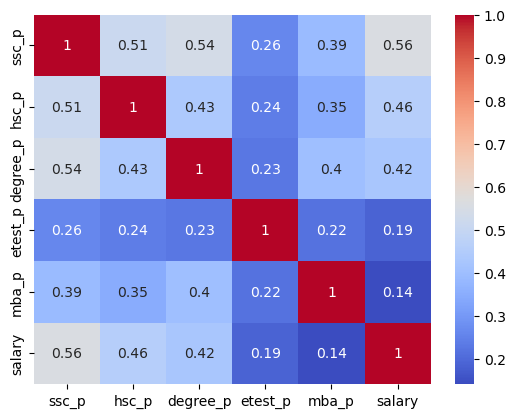

In [63]:
#How to Detect Multicollinearity?
#Correlation Matrix
#Look for correlation values >|0.8| between predictors.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = dataset[num_cals].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()